In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from PIL import Image, ImageOps

#ML bs 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,matthews_corrcoef
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Import Util
from util import *

In [2]:
DATA_DIR = 'data'
LABELS_FILE = os.path.join(DATA_DIR, 'labels.csv')
SETS_FILE = os.path.join(DATA_DIR, 'sets.csv')

In [3]:
labels_df = pd.read_csv(LABELS_FILE)
sets_df = pd.read_csv(SETS_FILE)
print(f"Loaded {len(labels_df)} labels and {len(sets_df)} sets.")

Loaded 1803 labels and 17 sets.


In [4]:
# Drop Nan rows
print(f"Labels before cleaning: {len(labels_df)}")
labels_df = labels_df.dropna(subset=['SensorFile'])
print(f"Labels after cleaning: {len(labels_df)}")

Labels before cleaning: 1803
Labels after cleaning: 1700


In [5]:
# Create dictionary: { 'sensor_filename.csv' : 'path/to/image.jpg' }
sensor_to_image_map = dict(zip(
    labels_df['SensorFile'].apply(os.path.basename), 
    labels_df['ImageFile']
))

# Create dictionary: { 'sensor_filename.csv' : wear_value }
sensor_to_wear_map = dict(zip(
    labels_df['SensorFile'].apply(os.path.basename), 
    labels_df['wear']
))

In [9]:
for root, dirs, files in os.walk(DATA_DIR):
    if os.path.basename(root) == 'sensordata':
        set_name = os.path.basename(os.path.dirname(root))
        
        # Check if already done
        target_pkl = os.path.join(DATA_DIR, f"{set_name}_linked.pkl")
        if os.path.exists(target_pkl):
            print(f"[{set_name}] Cache exists. Skipping.")
            continue
        
        # Run the processing function
        process_set_batch(root, set_name, sensor_to_image_map, sensor_to_wear_map, DATA_DIR)

print("All sets processed.")

[Set4] Found 105 files.
[Set4] Success. Saved 8593000 rows to data/Set4_linked.pkl
[Set16] Found 101 files.
[Set16] Success. Saved 16653000 rows to data/Set16_linked.pkl
[Set12] Found 53 files.
[Set12] Success. Saved 6037000 rows to data/Set12_linked.pkl
[Set6] Found 213 files.
[Set6] Success. Saved 18500000 rows to data/Set6_linked.pkl
[Set17] Found 75 files.
[Set17] Success. Saved 5992000 rows to data/Set17_linked.pkl
[Set11] Found 102 files.
[Set11] Success. Saved 9561000 rows to data/Set11_linked.pkl
[Set9] Found 102 files.
[Set9] Success. Saved 8721000 rows to data/Set9_linked.pkl
[Set14] Found 158 files.
[Set14] Success. Saved 13723000 rows to data/Set14_linked.pkl
[Set13] Found 51 files.
[Set13] Success. Saved 4839000 rows to data/Set13_linked.pkl
[Set5] Found 68 files.
[Set5] Success. Saved 6729000 rows to data/Set5_linked.pkl
[Set3] Found 105 files.
[Set3] Success. Saved 10319000 rows to data/Set3_linked.pkl
[Set15] Found 51 files.
[Set15] Success. Saved 4473000 rows to data/S

In [6]:
set1_path = os.path.join(DATA_DIR, 'Set1_linked.pkl')

if os.path.exists(set1_path):
    set1_df = pd.read_pickle(set1_path)
    print(f"Loaded Set 1 Data: {set1_df.shape}")
else:
    print(f"File not found: {set1_path}")

Loaded Set 1 Data: (7628000, 10)


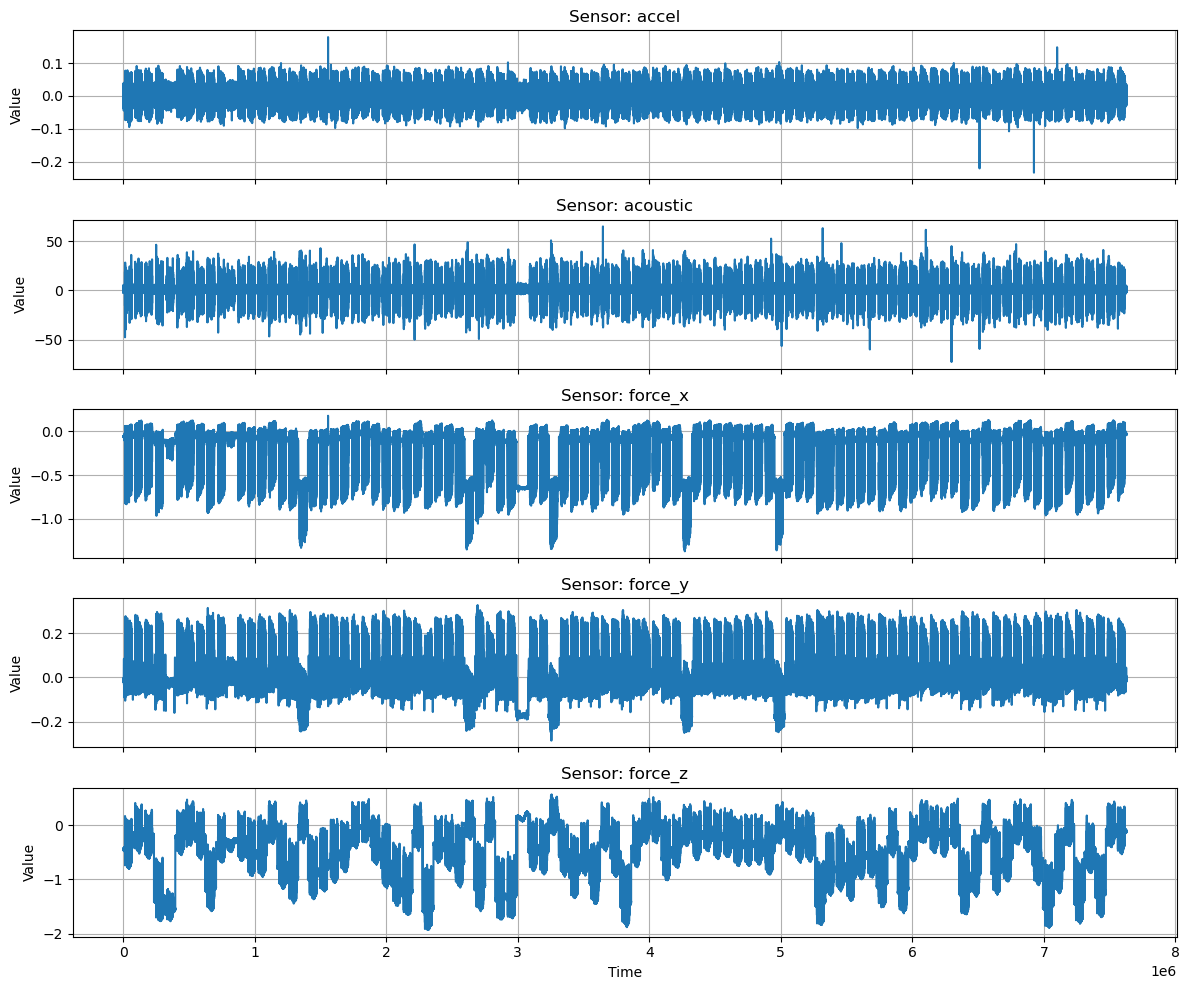

In [7]:
if 'set1_df' in locals():
    timeseries(set1_df)

In [20]:
# Extract features from an image using Local Binary Pattern
for image_path in set1_df['image_path']:
    with Image.open(image_path) as im:
        LBP_image = compute_LocalBinaryPattern(im)
        img = Image.fromarray(LBP_image)
        #img.show()
        hist, _ = np.histogram(LBP_image.flatten(), bins=256, range=(0, 256))
        features = hist.astype(float) / hist.sum()
        print(features)

[6.85864725e-02 7.22202798e-03 1.59973247e-02 6.61210728e-03
 7.12758417e-03 1.13882586e-03 6.48446444e-03 3.75386893e-03
 1.30645619e-02 6.53406478e-03 3.41712174e-03 6.37213279e-03
 2.44716498e-03 1.41160297e-03 2.28087252e-03 4.99908034e-03
 1.28296912e-02 2.46282303e-03 3.41196846e-03 2.31010749e-03
 6.33739769e-03 1.41140477e-03 6.22888145e-03 4.95037191e-03
 2.29390438e-03 1.93461159e-03 5.86631830e-04 1.58646772e-03
 1.89189880e-03 1.66143807e-03 1.55252543e-03 5.12707003e-03
 7.24531686e-03 1.09769870e-03 2.63317866e-03 1.33836690e-03
 1.83778934e-03 2.82637719e-04 2.23409657e-03 1.16538508e-03
 6.52861420e-03 3.88735876e-03 2.47957120e-03 5.04065345e-03
 2.34959947e-03 1.26389206e-03 3.01640448e-03 6.34240232e-03
 2.46857092e-03 6.42723327e-04 9.20505069e-04 7.90434239e-04
 2.33909470e-03 4.96598041e-04 2.94965957e-03 2.28077342e-03
 1.91890398e-03 1.65217207e-03 6.34448345e-04 1.75062949e-03
 2.83252149e-03 1.96523397e-03 3.11818181e-03 8.56871942e-03
 1.59494586e-02 2.654782

KeyboardInterrupt: 